This notebook reproduces plots in Figure S4.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import h5py
import os
import glob
import seaborn as sns
import statsmodels.stats.multitest as smm

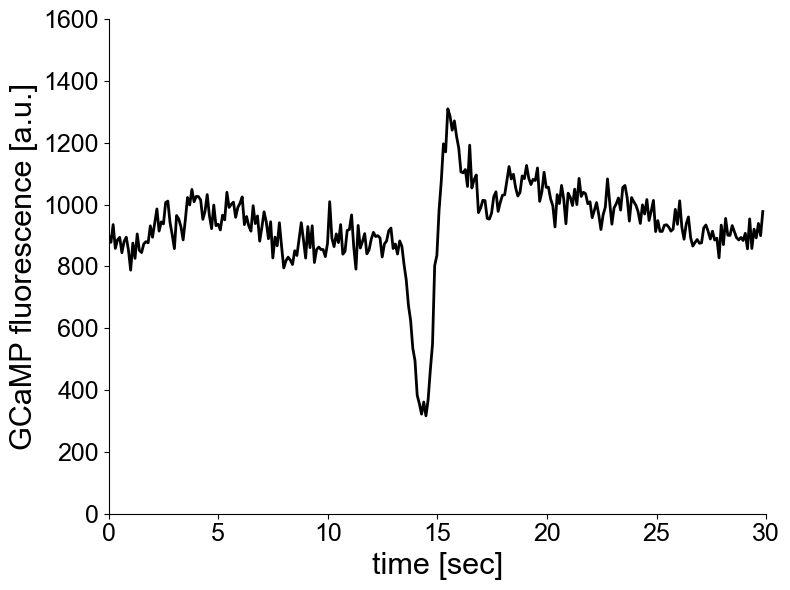

In [29]:
#Fig S4A left
data=h5py.File('../data/FigS4/control_original_traces/sample_3_original_traces.h5', 'r')
plt.figure(figsize=(8,6))
plt.rcParams['font.family']='Arial'
time=np.array(data['time_before'])
F=np.array(data['A4R_before'])
plt.plot(time, F, color='k', lw=2)
plt.ylim(0, 1600)
plt.xlim(0,30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('GCaMP fluorescence [a.u.]', fontsize=22)
plt.xlabel('time [sec]', fontsize=22)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig('figures/FigS4A_left.svg')

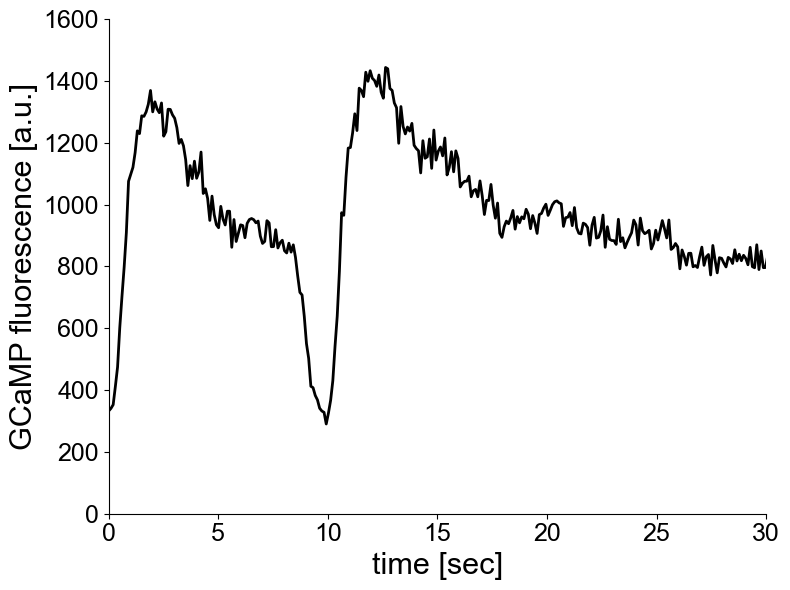

In [30]:
#figure S4A right
plt.figure(figsize=(8,6))
plt.rcParams['font.family']='Arial'
time=np.array(data['time_after'])
F=np.array(data['A4R_after'])
plt.plot(time, F, color='k', lw=2)
plt.ylim(0, 1600)
plt.xlim(0,30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('GCaMP fluorescence [a.u.]', fontsize=22)
plt.xlabel('time [sec]', fontsize=22)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig('figures/FigS4A_right.svg')

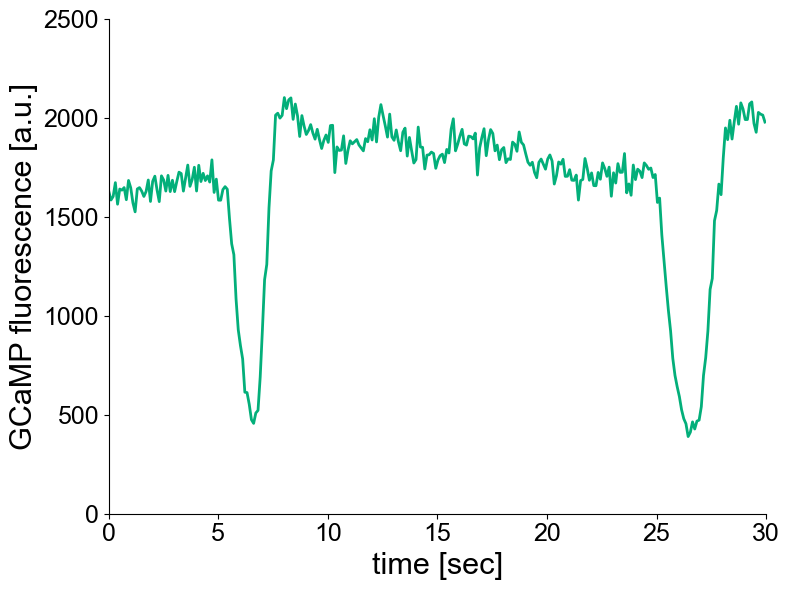

In [31]:
#Fig S4B right
data=h5py.File('../data/FigS4/TTX_original_traces/sample_1_original_traces.h5', 'r')
plt.figure(figsize=(8,6))
plt.rcParams['font.family']='Arial'
time=np.array(data['time_before'])
F=np.array(data['A4L_before'])
plt.plot(time, F, color=(3/255,175/255,122/255),lw=2)
plt.ylim(0, 2500)
plt.xlim(0,30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('GCaMP fluorescence [a.u.]', fontsize=22)
plt.xlabel('time [sec]', fontsize=22)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig('figures/FigS4B_left.svg')

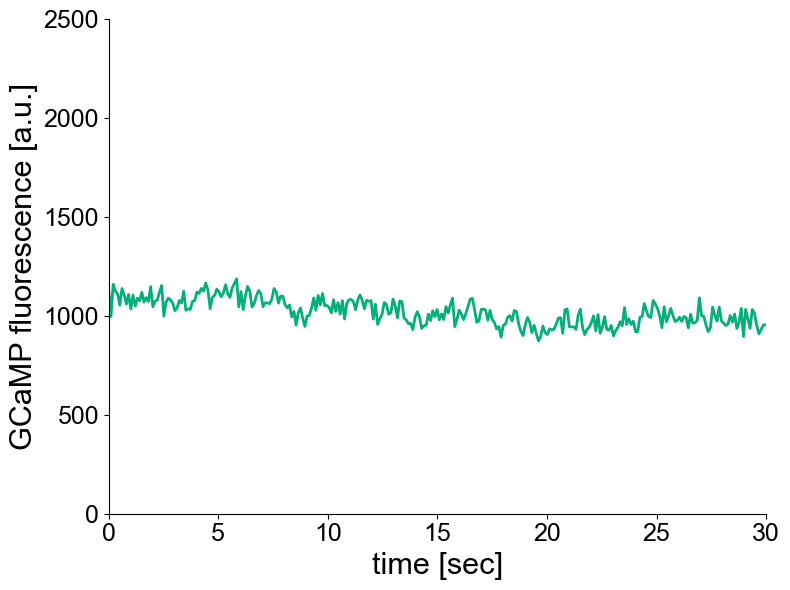

In [32]:
#Fig S4B right
plt.figure(figsize=(8,6))
plt.rcParams['font.family']='Arial'
time=np.array(data['time_after'])
F=np.array(data['A4L_after'])
plt.plot(time, F, color=(3/255,175/255,122/255),lw=2)
plt.ylim(0, 2500)
plt.xlim(0,30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('GCaMP fluorescence [a.u.]', fontsize=22)
plt.xlabel('time [sec]', fontsize=22)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig('figures/FigS4B_right.svg')

In [33]:
#Computing the rate of change in fluorescence intensity before and after buffer excahange
path='../data/FigS4/control_baseline/'
control_rate=[]
for i in range(1,6):
    base_before= pd.read_csv(path+f'baseline_before_sample{i}.csv', index_col=0)
    base_after= pd.read_csv(path+f'baseline_after_sample{i}.csv',   index_col=0)
    for key in base_before.keys():
        control_rate.append((base_after[key.split('_')[0]+'_after']/base_before[key]).iloc[0])
control_rate=np.array(control_rate)

path='../data/FigS4/TTX_baseline/'
TTX_rate=[]
for i in range(1,6):
    base_before= pd.read_csv(path+f'baseline_before_sample{i}.csv', index_col=0)
    base_after= pd.read_csv(path+f'baseline_after_sample{i}.csv',   index_col=0)
    for key in base_before.keys():
        TTX_rate.append((base_after[key.split('_')[0]+'_after']/base_before[key]).iloc[0])
TTX_rate=np.array(TTX_rate)

In [34]:
#statistical test
s1, p1=scipy.stats.mannwhitneyu(control_rate, TTX_rate)
print(p1)

0.017513577403687516


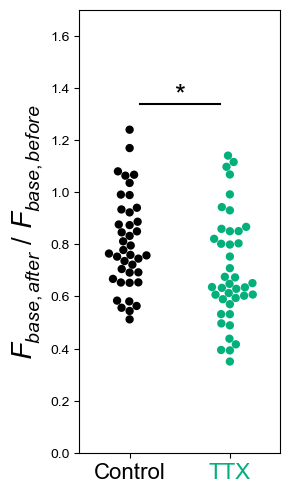

In [35]:
#Fig S4C
fig=plt.figure(figsize=(3,5))
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.family']='Arial'
ax=fig.add_subplot(1,1,1)
ax = sns.swarmplot(data=[control_rate, TTX_rate], palette=['k', (3/255,175/255,122/255)], size=6)
plt.xlim(-0.5, 1.5)
plt.ylim(0, 1.7)
plt.ylabel('$F_{base,after}$ / $F_{base,before}$', fontsize=20)
plt.text(0,-0.1, 'Control',ha='center', fontsize=16)
plt.text(1,-0.1, 'TTX',ha='center', c=(3/255,175/255,122/255),fontsize=16)

x1, x2 = 0, 1
y, h, col = np.array(control_rate).max() + 0.1, 0, 'k'
ax.plot([x1+0.1, x1+0.1, x2-0.1, x2-0.1], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h-0.02, "*", ha='center', va='bottom', color=col,  fontsize=20)

plt.gca().axes.xaxis.set_ticklabels([])

plt.tight_layout()
plt.savefig('figures/FigS4C.svg')

In [36]:
#Comparison  of baseline fluorescence before and after TTX application, and dip fluorescence before TTX application
path='../data/FigS4/TTX_baseline/'
baseline_before_TTX=[]
dip_before_TTX=[]
baseline_after_TTX=[]
for i in range(1,6):
    dip_before= pd.read_csv(path+f'dip_before_sample{i}.csv', index_col=0)
    base_before= pd.read_csv(path+f'baseline_before_sample{i}.csv', index_col=0)
    base_after= pd.read_csv(path+f'baseline_after_sample{i}.csv', index_col=0)

    for key in dip_before.keys():
        dip_before_TTX.append(dip_before[key].iloc[0])
        baseline_before_TTX.append(base_before[key].iloc[0])
        baseline_after_TTX.append(base_after[key.split('_')[0]+'_after'].iloc[0])

In [37]:
#statistical test
s1, p1=scipy.stats.wilcoxon(baseline_before_TTX, baseline_after_TTX)
s2, p2=scipy.stats.wilcoxon(dip_before_TTX, baseline_after_TTX)
corrected_p_values = smm.multipletests([p1, p2], alpha=0.05, method='holm')[1]
print("Corrected p-values:[Fbaseline before vs after TTX, dip before vs baseline after TTX]")
print(corrected_p_values)

Corrected p-values:[Fbaseline before vs after TTX, dip before vs baseline after TTX]
[1.02445483e-08 2.16823537e-07]


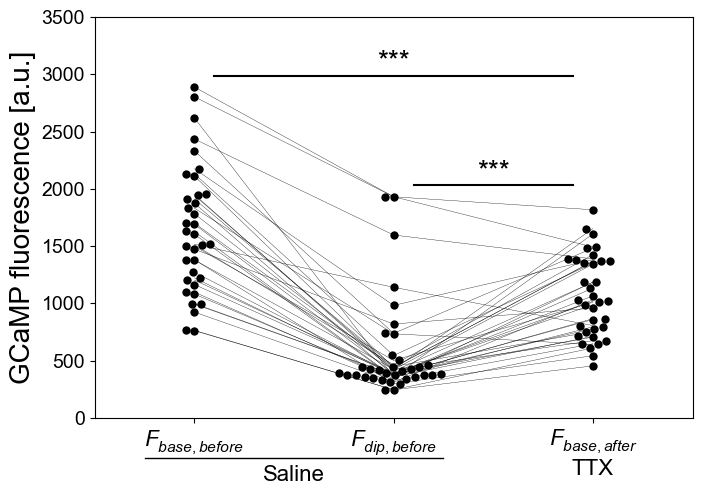

In [38]:
fig=plt.figure(figsize=(7,5))
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['font.family'] = 'Arial'

ax=fig.add_subplot(1,1,1)
ax = sns.swarmplot(data=[baseline_before_TTX, dip_before_TTX, baseline_after_TTX], color= 'k', size=6)
plt.plot([np.zeros(len(baseline_before_TTX)), np.ones(len(dip_before_TTX))],
          [baseline_before_TTX, dip_before_TTX], c='k', lw=0.25)
plt.plot([np.ones(len(dip_before_TTX)), 2*np.ones(len(baseline_after_TTX))],
      [dip_before_TTX, baseline_after_TTX], c='k', lw=0.25)
plt.xlim(-0.5, 2.5)
plt.ylim(0, 3500)
plt.ylabel('GCaMP fluorescence [a.u.]', fontsize=20)
plt.text(0,-250, '$F_{base, before}$',ha='center', fontsize=16)
plt.text(1,-250, '$F_{dip,before}$',ha='center', fontsize=16)
plt.text(2,-500, '$F_{base, after}$ \nTTX',ha='center', fontsize=16)
ax.plot([-0.25,-0.25,1.25,1.25],[-350,-350,-350,-350],lw=1, c='k', clip_on=False)
plt.text(0.5,-550,'Saline',ha='center', fontsize=16)
x1, x2 = 0, 2
y, h, col = np.array(baseline_before_TTX).max() + 100, 0, 'k'
ax.plot([x1+0.1, x1+0.1, x2-0.1, x2-0.1], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h-0.02, "***", ha='center', va='bottom', color=col,  fontsize=20)


x1, x2 = 1, 2
y, h, col = np.array(dip_before_TTX).max() + 100, 0, 'k'
ax.plot([x1+0.1, x1+0.1, x2-0.1, x2-0.1], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h-0.02, "***", ha='center', va='bottom', color=col,  fontsize=20)

plt.gca().axes.xaxis.set_ticklabels([])
plt.tight_layout()
plt.yticks(fontsize=14)
plt.savefig('figures/FigS4D.svg')
